In [100]:
import sys
import traceback
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import scipy.stats as stats
from metpy.cbook import get_test_data
import netCDF4 as nc  

import pyOptimalEstimation as pyOE

%matplotlib inline
sns.set(style='ticks', palette='deep')


sys.path.append('lib')
import nonScatMWRadTran
import supporting_routines

In [101]:
prior = xr.open_dataset("E:/SAMEER/pyOptimalEstimation_examples-master/pyOptimalEstimation_examples-master/data/testmumbai7.nc", engine='netcdf4')
prior

<xarray.Dataset>
Dimensions:   (time: 12824, height: 30)
Coordinates:
  * time      (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-28
  * height    (height) float64 0.0 84.02 365.4 ... 1.032e+04 1.062e+04 1.086e+04
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 ...

In [102]:
prior.bar_pres

<xarray.DataArray 'bar_pres' (time: 12824, height: 30)>
[384720 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-28
  * height   (height) float64 0.0 84.02 365.4 ... 1.032e+04 1.062e+04 1.086e+04
Attributes:
    long_name:  Pressure in Pa
    units:      Pa

In [103]:


import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
# table1 = pd.DataFrame({'time': prior['time']})
table1= pd.DataFrame (prior.bar_pres)

# Display the table

print(table1)
table1

             0         1         2        3        4        5        6   \
0      100800.0  100000.0   79300.0  76500.0  73900.0  63900.0  60000.0   
1      101000.0  100000.0   97700.0  96100.0  92500.0  92100.0  85000.0   
2      100800.0  100000.0   92500.0  85500.0  85000.0  79600.0  74100.0   
3      101000.0  100000.0   99300.0  92500.0  89000.0  85000.0  75700.0   
4      100800.0  100000.0   92500.0  85000.0  70000.0  50000.0  40000.0   
...         ...       ...       ...      ...      ...      ...      ...   
12819  100300.0  100000.0   99900.0  99200.0  99100.0  97100.0  96400.0   
12820  100600.0  100200.0  100000.0  99400.0  98900.0  98300.0  97500.0   
12821  100800.0  100400.0  100000.0  99000.0  94100.0  92500.0  90600.0   
12822  100800.0  100000.0   99500.0  94300.0  92500.0  88300.0  87600.0   
12823  100800.0  100000.0   99000.0  96100.0  92500.0  90800.0  89300.0   

            7        8        9   ...       20       21       22       23  \
0      58700.0  50200.

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,100800.0,100000.0,79300.0,76500.0,73900.0,63900.0,60000.0,58700.0,50200.0,38400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101000.0,100000.0,97700.0,96100.0,92500.0,92100.0,85000.0,73700.0,70400.0,70000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100800.0,100000.0,92500.0,85500.0,85000.0,79600.0,74100.0,71300.0,70000.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101000.0,100000.0,99300.0,92500.0,89000.0,85000.0,75700.0,73000.0,70000.0,62000.0,...,30000.0,25000.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100800.0,100000.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,25000.0,20000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12819,100300.0,100000.0,99900.0,99200.0,99100.0,97100.0,96400.0,95000.0,94200.0,92700.0,...,60000.0,58900.0,55300.0,53800.0,50000.0,40000.0,30000.0,25000.0,20000.0,17700.0
12820,100600.0,100200.0,100000.0,99400.0,98900.0,98300.0,97500.0,96800.0,95400.0,92500.0,...,69800.0,60000.0,55300.0,50000.0,40000.0,30000.0,27300.0,25000.0,21700.0,20000.0
12821,100800.0,100400.0,100000.0,99000.0,94100.0,92500.0,90600.0,90000.0,88700.0,85100.0,...,50000.0,46600.0,42900.0,40000.0,30000.0,28100.0,25000.0,20000.0,NaN,NaN
12822,100800.0,100000.0,99500.0,94300.0,92500.0,88300.0,87600.0,86200.0,85000.0,73900.0,...,50000.0,49700.0,44700.0,40000.0,35700.0,30000.0,25000.0,22900.0,20000.0,19900.0


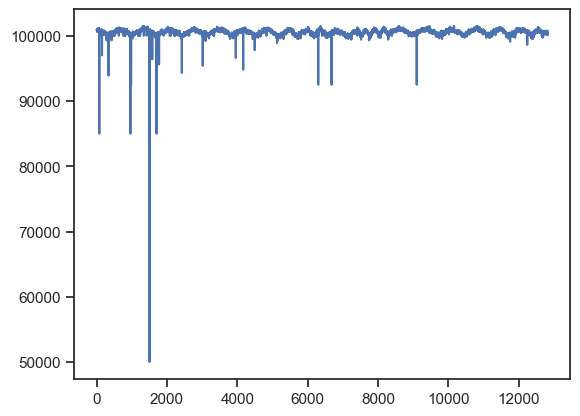

In [104]:
plt.plot(table1[0])

In [105]:
prior.q

<xarray.DataArray 'q' (time: 12824, height: 30)>
[384720 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-28
  * height   (height) float64 0.0 84.02 365.4 ... 1.032e+04 1.062e+04 1.086e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [106]:
prior.temp

<xarray.DataArray 'temp' (time: 12824, height: 30)>
[384720 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-28
  * height   (height) float64 0.0 84.02 365.4 ... 1.032e+04 1.062e+04 1.086e+04
Attributes:
    long_name:  temperature
    units:      K

In [107]:
import pandas as pd

# Specify the path to your CSV file with escaped backslashes
csv_file_path = "C:\\Users\\angsh\\Downloads\\datetime_file_new.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


              Test_time
0      01-01-2000 00:00
1      01-01-2000 12:00
2      02-01-2000 00:00
3      02-01-2000 12:00
4      03-01-2000 00:00
...                 ...
11821  29-12-2023 00:00
11822  29-12-2023 12:00
11823  30-12-2023 00:00
11824  30-12-2023 12:00
11825  31-12-2023 00:00

[11826 rows x 1 columns]


In [108]:
import pandas as pd
import xarray as xr

# Read the CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\angsh\\Downloads\\datetime_file.csv"
df = pd.read_csv(csv_file_path)

# Convert the 'Test_time' column to datetime64
df['Test_time'] = pd.to_datetime(df['Test_time'], format='%d-%m-%Y %H:%M')

# Assuming you have already loaded your data into prior
# prior: xarray.Dataset

# Make sure that df is sorted by 'Test_time'
df = df.sort_values(by='Test_time')

# If 'time' is already a coordinate in prior and you want to replace its values,
# you can use the .assign_coords() method instead of direct assignment:
prior = prior.assign_coords(time=df['Test_time'])
# prior = prior.assign_coords(time=df.index)
prior = prior.assign_coords(height=prior.height)


# Now the 'time' coordinate in prior has been replaced with the 'Test_time' values from df
prior

<xarray.Dataset>
Dimensions:   (time: 12824, height: 30)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01T12:00:00 ... 2023-10-05
  * height    (height) float64 0.0 84.02 365.4 ... 1.032e+04 1.062e+04 1.086e+04
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 1.008e+05 1e+05 7.93e+04 ... nan nan

In [109]:
import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
table = pd.DataFrame({'time': prior['time']})

# Display the table

print(table)
table

                     time
0     2000-01-01 12:00:00
1     2000-01-02 00:00:00
2     2000-01-02 12:00:00
3     2000-01-03 00:00:00
4     2000-01-03 12:00:00
...                   ...
12819 2023-10-01 00:00:00
12820 2023-10-02 00:00:00
12821 2023-10-03 00:00:00
12822 2023-10-04 00:00:00
12823 2023-10-05 00:00:00

[12824 rows x 1 columns]


,time
0,2000-01-01 12:00:00
1,2000-01-02 00:00:00
2,2000-01-02 12:00:00
3,2000-01-03 00:00:00
4,2000-01-03 12:00:00
...,...
12819,2023-10-01 00:00:00
12820,2023-10-02 00:00:00
12821,2023-10-03 00:00:00
12822,2023-10-04 00:00:00


In [110]:
prior.time

<xarray.DataArray 'time' (time: 12824)>
array(['2000-01-01T12:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-02T12:00:00.000000000', ..., '2023-10-03T00:00:00.000000000',
       '2023-10-04T00:00:00.000000000', '2023-10-05T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 2000-01-02 ... 2023-10-05

In [111]:
prior.q

<xarray.DataArray 'q' (time: 12824, height: 30)>
[384720 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 2000-01-02 ... 2023-10-05
  * height   (height) float64 0.0 84.02 365.4 ... 1.032e+04 1.062e+04 1.086e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [112]:
# import pandas as pd

# # Assuming 'table' is your DataFrame with a column named 'time'

# # Step 1: Get unique dates
# unique_dates = table['time'].unique()

# # Step 2: Randomly select 5 unique dates
# random_dates = pd.Series(unique_dates).sample(n=8, random_state=42)  # Set random_state for reproducibility

# print(random_dates)


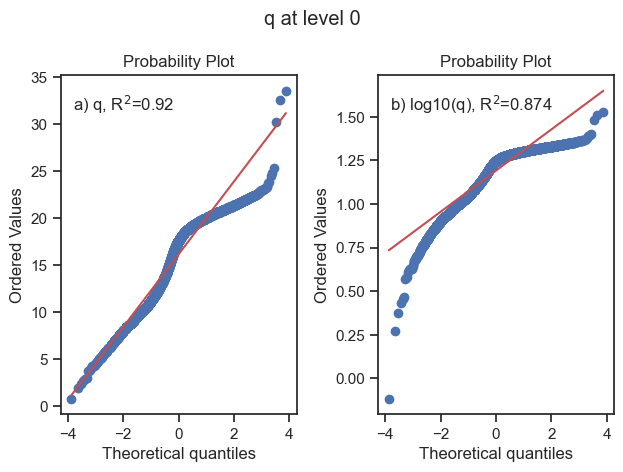

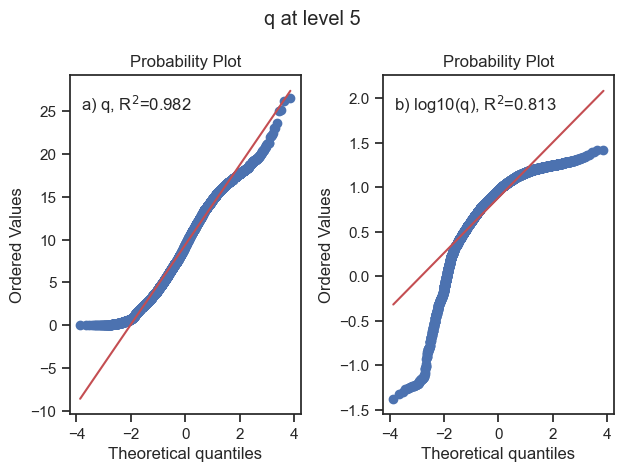

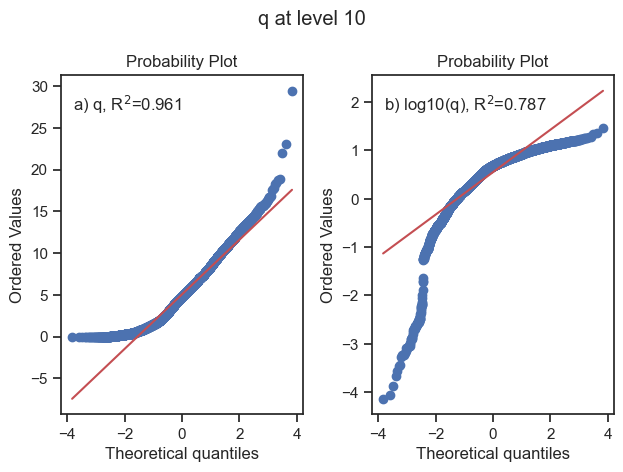

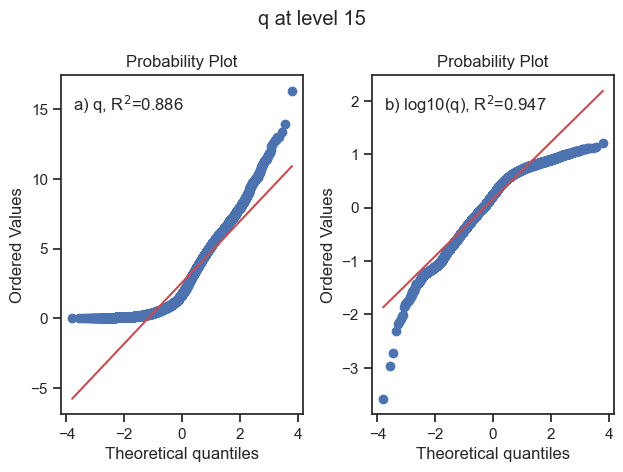

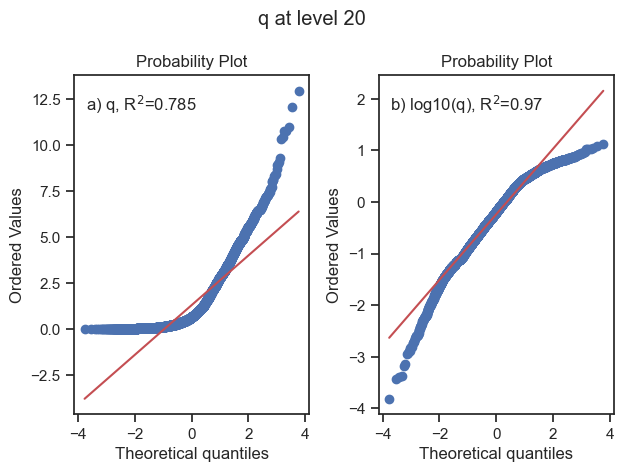

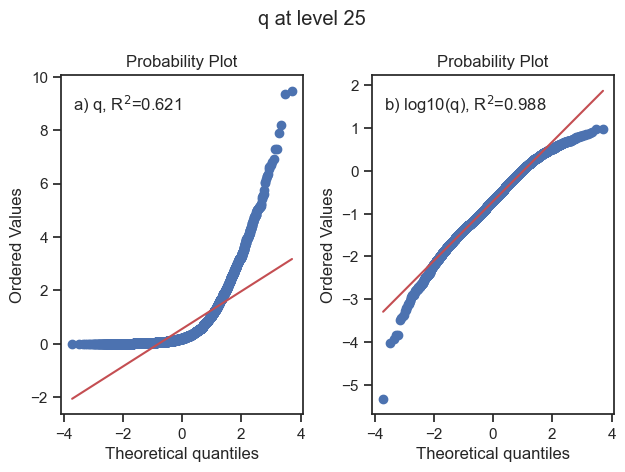

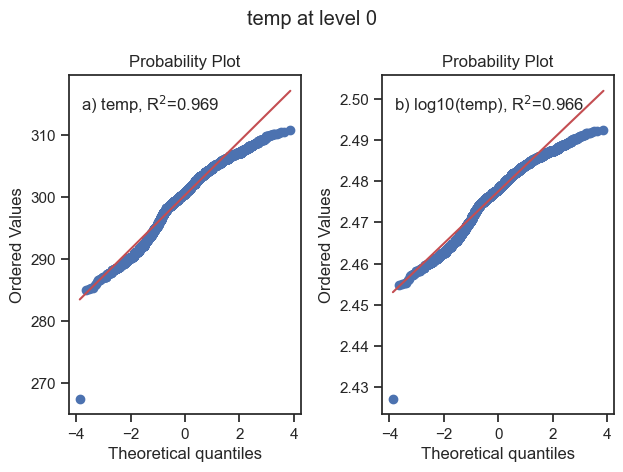

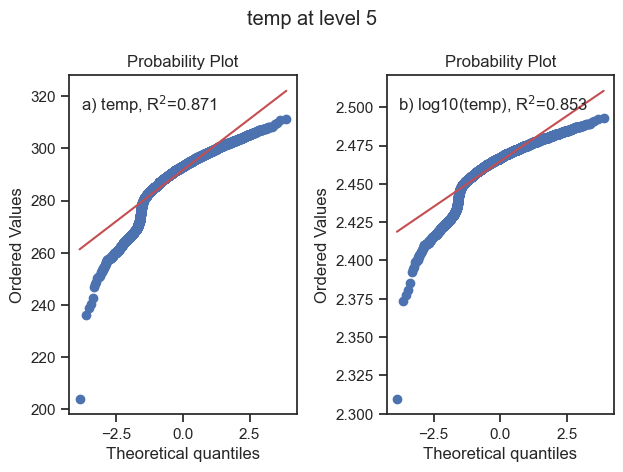

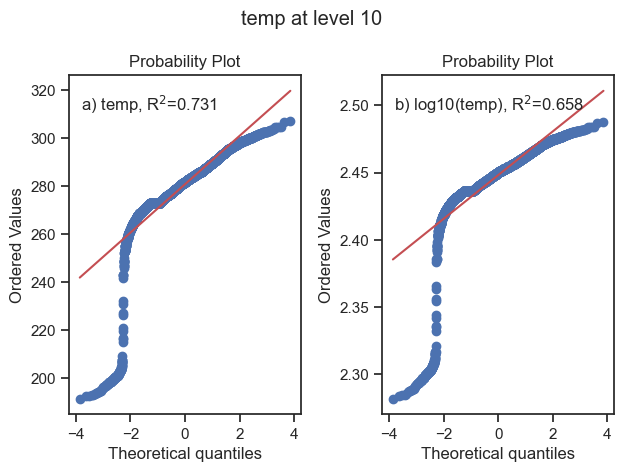

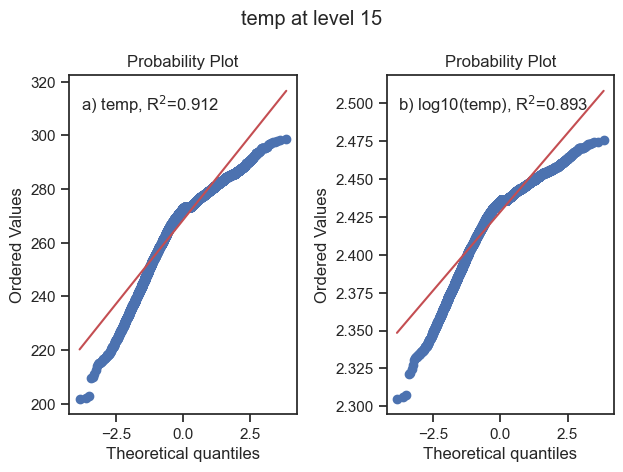

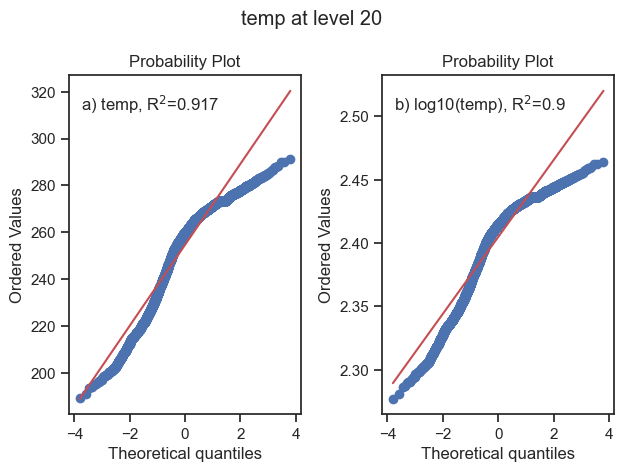

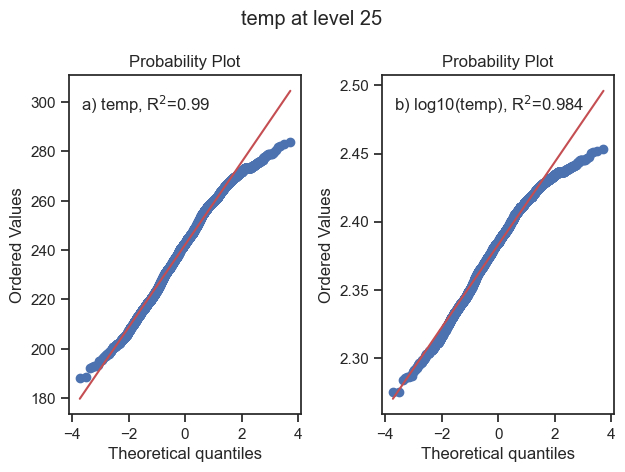

In [113]:
for var in ['q', 'temp']:
    for h in range(0, 30, 5):
        fig, (ax, ax1) = plt.subplots(ncols=2)
        plt.suptitle('%s at level %i' % (var,h))
        (osm, osr), (slope, intercept, r) = stats.probplot(
            prior[var].isel(height=h).dropna('time').values,
            dist="norm",
            plot=ax,
            fit=True,
            rvalue=False)
        ax.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('a', var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)

        (osm, osr), (slope, intercept, r) = stats.probplot(
            np.log10(prior[var].isel(height=h).dropna('time').values),
            dist="norm",
            plot=ax1,
            fit=True,
            rvalue=False)
        ax1.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('b', 'log10(%s)'%var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax1.transAxes)
        fig.tight_layout()

In [114]:
import numpy as np
import pandas as pd

# Assuming 'prior' is your pandas DataFrame
prior['q'] = np.log10(prior['q'])



In [115]:
prior['q']

<xarray.DataArray 'q' (time: 12824, height: 30)>
array([[ 0.99676268,  0.98319317,  0.82497717, ...,         nan,
                nan,         nan],
       [ 1.06299055,  1.07295142,  1.07211456, ...,         nan,
                nan,         nan],
       [ 1.00245637,  0.96039411,  0.8185474 , ...,         nan,
                nan,         nan],
       ...,
       [ 1.27523207,  1.28225548,  1.27874306, ..., -1.18074892,
                nan,         nan],
       [ 1.29102961,  1.26555117,  1.25980679, ..., -1.05607078,
        -1.40558234, -1.40340537],
       [ 1.27523207,  1.31025064,  1.29368532, ..., -1.26266505,
                nan,         nan]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 2000-01-02 ... 2023-10-05
  * height   (height) float64 0.0 84.02 365.4 ... 1.032e+04 1.062e+04 1.086e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [116]:
profileTT = np.array([
    '2017-12-23T12:00:00.000000000', '2007-06-12T00:00:00.000000000',
    '2023-09-27T12:00:00.000000000', '2011-11-03T00:00:00.000000000',
     ],dtype='datetime64[ns]')
profiles = prior.sel(time=profileTT)
prior = prior.drop_sel(time=profileTT)
nLev = len(prior.height)
nLev

# 02-02-2000 00:00
# 02-02-2000 12:00
# 03-02-2000 00:00
# 03-02-2000 12:00
# 04-02-2000 00:00
# 04-02-2000 12:00
# 05-02-2000 00:00
# 05-02-2000 12:00

#    2008-10-14 00:00:00
#   2004-05-29 12:00:00
#   2015-09-21 12:00:00
#   2000-07-22 12:00:00
#    2000-06-13 12:00:00
#      2018-03-10 12:00:00
# 2008-08-14 12:00:00 

# '2008-08-14T12:00:00.000000000',


# profileTT = np.array([
#     '2017-12-21T12:00:00.000000000', '2004-05-23T00:00:00.000000000',
#    '2001-06-06T12:00:00.000000000', '2011-11-03T00:00:00.000000000',
#      ],dtype='datetime64[ns]')

30

In [117]:
priors = {'all': prior}

seasons = [
    'DJF',
    'MAM',
    'JJA',
    'SON',
]
months = (
    [12, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
)
for season, month in zip(seasons, months):
    priors[season] = prior.where(
        np.in1d(prior['time.month'], month)[:, np.newaxis]).dropna(
            'time', how='all')

In [118]:
# prior_qts = {}
# for season in priors.keys():
#     prior_q = priors[season]['q'].to_pandas()
#     prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
#     prior_t = priors[season]['temp'].to_pandas()
#     prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
#     prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
#     prior_qts[season] = prior_qts[season].reindex(
#         sorted(prior_qts[season].columns), axis=1)

# prior_qts

prior_qts = {}
for season in priors.keys():
    prior_q = priors[season]['q'].to_pandas()
    prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
    prior_t = priors[season]['temp'].to_pandas()
    prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
    prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
    prior_qts[season] = prior_qts[season].reindex(
        sorted(prior_qts[season].columns), axis=1)

prior_qts

{'all':                       00000_q  00000_t   00084_q  00084_t   00365_q  00365_t  \
 time                                                                           
 2000-01-01 12:00:00  0.996763   303.15  0.983193   302.55  0.824977   287.75   
 2000-01-02 00:00:00  1.062991   291.95  1.072951   293.75  1.072115   298.35   
 2000-01-02 12:00:00  1.002456   304.35  0.960394   303.75  0.818547   298.75   
 2000-01-03 00:00:00  0.989933   291.95  0.983008   295.55  0.980455   298.35   
 2000-01-03 12:00:00  1.019406   304.95  0.994596   303.95  0.788434   297.75   
 ...                       ...      ...       ...      ...       ...      ...   
 2023-10-01 00:00:00  1.301058   299.15  1.281361   298.95  1.271248   298.75   
 2023-10-02 00:00:00  1.305001   299.95  1.277855   299.15  1.281366   299.15   
 2023-10-03 00:00:00  1.275232   299.15  1.282255   299.55  1.278743   299.55   
 2023-10-04 00:00:00  1.291030   299.95  1.265551   299.75  1.259807   299.55   
 2023-10-05 00:00:00 

In [119]:
x_cov = []
x_mean = []

for season in ['all'] + seasons:

    x_cov1 = prior_qts[season].cov().rename_axis('state', axis=0).rename_axis('stateT', axis=1)
    x_mean1 = prior_qts[season].mean().rename_axis('state', axis=0)

    x_cov.append(xr.DataArray(x_cov1))
    x_mean.append(xr.DataArray(x_mean1))

x_cov = xr.concat(x_cov, dim='season')
x_mean = xr.concat(x_mean, dim='season')

x_cov['season'] = ['all'] + seasons
x_mean['season'] = ['all'] + seasons

In [120]:
for season in x_cov.season:
    assert np.linalg.matrix_rank(x_cov.sel(season=season).to_pandas()) ==  x_cov.shape[-1]

Text(0, 0.5, 'Height [m]')

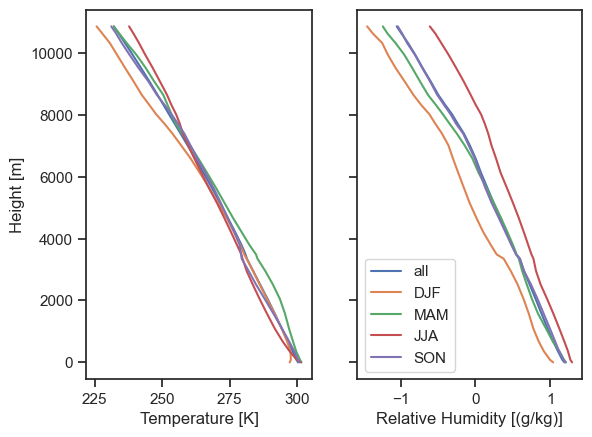

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for season in ['all'] + seasons:
    t, q = supporting_routines.splitTQ(x_mean.sel(season=season).to_pandas())
    ax1.plot(t, t.index, label=season)
    ax2.plot(q, q.index, label=season)

ax2.legend()
ax1.set_xlabel('Temperature [K]')
ax2.set_xlabel('Relative Humidity [(g/kg)]')
ax1.set_ylabel('Height [m]')

Text(0.5, 1.0, '$\\mathbb{S}_{a}$ Humidity')

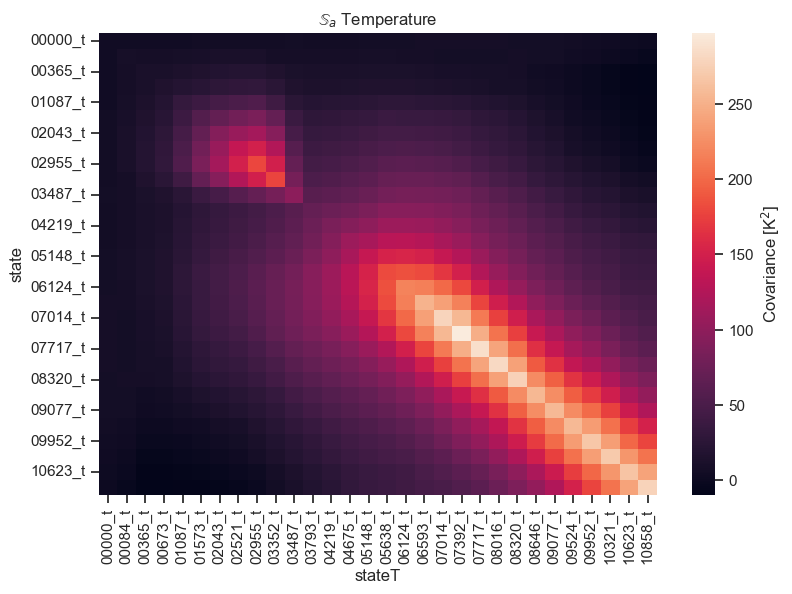

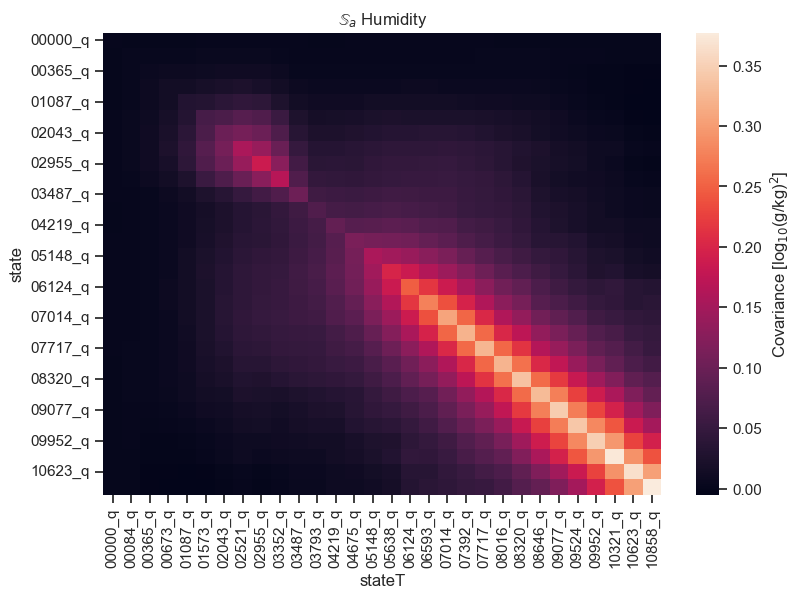

In [122]:
S_a = x_cov.sel(season='JJA').to_pandas()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Temperature')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Humidity')

In [123]:
height = priors['all'].height

pressure = []
for k in ['all'] + seasons:
    pressure.append(priors[k].bar_pres.mean('time'))
pressure = xr.concat(pressure, dim='season')
pressure['season'] = ['all'] + seasons
pressure = pressure.to_pandas()
pressure

height,0.000000,84.019318,365.359123,673.348392,1087.596946,1573.012473,2043.610845,2521.941423,2955.644473,3352.667042,...,7717.680611,8016.022446,8320.089809,8646.283773,9077.221377,9524.605622,9952.944742,10321.175962,10623.957536,10858.891938
season,,,,,,,,,,,,,,,,,,,,,
all,100540.803432,99596.918877,96497.238474,93233.507649,89119.507620,84686.650980,80548.777035,76575.254973,72975.625646,69724.111308,...,40725.459587,39065.145726,37399.661689,35675.516594,33606.193634,31572.623090,29708.224843,28183.027602,26959.748050,26058.163014
DJF,100917.690500,100032.259147,97428.835180,94631.430490,90945.430108,86840.458530,82806.959459,78917.457627,75290.085179,71907.118294,...,39595.820502,37417.948718,35492.893145,33547.036433,31531.711606,29520.638978,27744.957386,26316.489796,24942.688911,23935.975610
MAM,100547.317388,99930.833872,97120.361991,94406.304559,91239.372371,87747.903802,84394.200065,80699.585509,77075.303378,73506.150794,...,42136.560868,40786.424557,39458.017765,37949.290061,35509.792443,33293.367060,30999.459459,28955.287206,27417.862481,26311.141805
JJA,100149.493445,98664.958284,94874.277198,90746.821844,85665.828845,80540.192250,75952.109705,71954.228554,68482.584785,65769.223573,...,39984.391643,38766.768559,37320.906568,35986.239444,34189.952904,32436.201117,30826.936830,29587.458527,28512.698413,27776.363636
SON,100591.035093,99832.143910,96716.012976,93393.510324,88988.304784,84093.368857,79588.539192,75293.084948,71598.108108,68175.781487,...,41066.574586,39162.619146,37203.104504,35122.489588,33041.927593,30850.982420,28997.975253,27537.348630,26496.366389,25655.734597


In [124]:
import numpy as np
import pandas as pd

#Assuming profiles is an xarray Dataset or DataArray
profiles_t = profiles['temp'].to_pandas()
profiles_t
# # Proceed with the rest of the code as before
profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
profiles_q = profiles['q'].to_pandas()
profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]
x_truths = pd.concat((profiles_t, profiles_q), axis=1)
x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
x_truths.columns.name = 'state'
x_truths.index.name = 'time'

# assert np.all(np.isfinite(x_truths))
x_truths



# import numpy as np
# import pandas as pd

# profiles_t = profiles['temp'].to_pandas()
# profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
# profiles_q = profiles['q'].to_pandas()
# profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]

# x_truths = pd.concat((profiles_t, profiles_q), axis=1)
# x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
# # x_truths = np.nan_to_num(x_truths) 
# x_truths
# x_truths.columns.name = 'state'
# x_truths.index.name = 'time'

# # Replace missing values with mean
# x_truths_filled = x_truths.fillna(x_truths.mean())

# # Check for infinite values
# infinite_values = not np.all(np.isfinite(x_truths_filled.values))
# print("Infinite Values Present after filling missing values:", infinite_values)

# # Ensure all values are finite
# assert np.all(np.isfinite(x_truths_filled)), "Not all values are finite after filling missing values"

# # Now x_truths_filled can be used without any infinite or missing values

# # assert np.all(np.isfinite(x_truths))
# x_truths

state,00000_t,00084_t,00365_t,00673_t,01087_t,01573_t,02043_t,02521_t,02955_t,03352_t,...,07717_q,08016_q,08320_q,08646_q,09077_q,09524_q,09952_q,10321_q,10623_q,10858_q
time,,,,,,,,,,,,,,,,,,,,,
2007-06-12 00:00:00,303.35,299.15,297.35,295.15,293.35,290.75,290.15,289.35,290.35,289.95,...,-0.491914,-0.336699,0.065021,0.392801,-0.079435,-0.078565,0.165928,-0.255971,-0.512017,-0.516689
2011-11-03 00:00:00,296.95,297.55,299.35,299.35,298.95,295.55,295.55,291.55,291.35,286.95,...,0.442914,0.431387,0.370590,0.105921,0.218192,0.055008,0.077820,-0.120621,-0.833191,-1.134490
2017-12-23 12:00:00,302.75,300.75,300.55,300.55,299.95,300.35,299.95,297.55,295.15,293.15,...,0.256466,-0.275806,-0.200957,0.122968,-0.249273,-0.229060,-0.161698,-0.333673,-0.373960,-1.051956
2023-09-27 12:00:00,303.15,302.15,301.95,301.35,297.15,297.55,297.35,294.95,294.55,294.35,...,0.517772,0.037125,-0.422026,-0.613195,-0.768245,-0.871573,-0.984721,-1.031950,-1.126302,-1.203258


In [125]:
# x_truths_filled = x_truths.interpolate(method='linear', axis=1, limit_direction='both')  # Interpolate NaN values along columns using linear interpolation
# # print(x_truths_filled)
# x_truths=x_truths_filled
# x_truths

assert np.all(np.isfinite(x_truths))
x_truths

state,00000_t,00084_t,00365_t,00673_t,01087_t,01573_t,02043_t,02521_t,02955_t,03352_t,...,07717_q,08016_q,08320_q,08646_q,09077_q,09524_q,09952_q,10321_q,10623_q,10858_q
time,,,,,,,,,,,,,,,,,,,,,
2007-06-12 00:00:00,303.35,299.15,297.35,295.15,293.35,290.75,290.15,289.35,290.35,289.95,...,-0.491914,-0.336699,0.065021,0.392801,-0.079435,-0.078565,0.165928,-0.255971,-0.512017,-0.516689
2011-11-03 00:00:00,296.95,297.55,299.35,299.35,298.95,295.55,295.55,291.55,291.35,286.95,...,0.442914,0.431387,0.370590,0.105921,0.218192,0.055008,0.077820,-0.120621,-0.833191,-1.134490
2017-12-23 12:00:00,302.75,300.75,300.55,300.55,299.95,300.35,299.95,297.55,295.15,293.15,...,0.256466,-0.275806,-0.200957,0.122968,-0.249273,-0.229060,-0.161698,-0.333673,-0.373960,-1.051956
2023-09-27 12:00:00,303.15,302.15,301.95,301.35,297.15,297.55,297.35,294.95,294.55,294.35,...,0.517772,0.037125,-0.422026,-0.613195,-0.768245,-0.871573,-0.984721,-1.031950,-1.126302,-1.203258


In [126]:
# def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):
#     # Convert X to a pandas DataFrame or Series object if it's a numpy array
#     if isinstance(X, np.ndarray):
#         X = pd.Series(X, index=[f'{i}_t' for i in pd.date_range(start='2015-09-21T12:00:00.000000000', periods=len(X), freq='D')])

#     # X contains T and Q, lets split the vector
#     t_index, q_index = supporting_routines.splitTQ(X)
#     # humidity is in log10 scale, convert to linear in kg/kg
#     temperature, humidity = supporting_routines.splitTQ(X)
#     humidity = (10**humidity) / 1000.  # Assign humidity before using it
#     # Height in meters comes from index of the temperature (or humidity) vector
#     heights = temperature.index
#     assert np.all(np.diff(heights) > 0)

#     # get absolute humidity from specific humidity
#     abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
#     # run the forward operator
#     TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
#         heights,  # [m]  
#         temperature,  # [K]
#         pressure,  # [Pa]
#         abs_humidity,  # [kgm^-3]
#         zenithAngle,  # zenith angle of observation in deg.
#         frequencies,  # frequency vector in GHz
#     )
#     return TB


In [127]:
def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):

    # X contains T and Q, lets split the vector
    temperature, humidity = supporting_routines.splitTQ(X)
    # humdity is in log10 scale, convert to linear in kg/kg
#     humidity = (10**humidity) / 1000.
    # Height in meters comes from index of the temperature (or humidty) vector
    heights = temperature.index
    assert np.all(np.diff(heights) > 0)

    # get absolute humidty from specific humdity
    abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
    # run the forward operator
    TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
        heights,  # [m]  
        temperature,  # [K]
        pressure,  # [Pa]
        abs_humidity,  # [kgm^-3]
        zenithAngle,  # zenith angle of observation in deg.
        frequencies,  # frequency vector in GHz
    )
    return TB

In [128]:
frequencies = [ 
   22.24, 23.04, 23.84, 25.44, 26.24, 27.84, 31.4, 51.26, 52.28, 53.86, 54.94,
    56.66, 57.3, 58.
]

# 22.23 
# 23.03 
# 23.83
# 26.23
# 30. 
# 51.25 
# 52.280
# 53.85
# 54.94 
# 56.66 
# 57.29
# 58.8
# 59.4 
# 60. 



In [129]:
y_vars = np.array(frequencies)
x_vars = x_mean.state.values
print('y_vars:\n', y_vars)
print('x_vars:\n', x_vars)

y_vars:
 [22.24 23.04 23.84 25.44 26.24 27.84 31.4  51.26 52.28 53.86 54.94 56.66
 57.3  58.  ]
x_vars:
 ['00000_q' '00000_t' '00084_q' '00084_t' '00365_q' '00365_t' '00673_q'
 '00673_t' '01087_q' '01087_t' '01573_q' '01573_t' '02043_q' '02043_t'
 '02521_q' '02521_t' '02955_q' '02955_t' '03352_q' '03352_t' '03487_q'
 '03487_t' '03793_q' '03793_t' '04219_q' '04219_t' '04675_q' '04675_t'
 '05148_q' '05148_t' '05638_q' '05638_t' '06124_q' '06124_t' '06593_q'
 '06593_t' '07014_q' '07014_t' '07392_q' '07392_t' '07717_q' '07717_t'
 '08016_q' '08016_t' '08320_q' '08320_t' '08646_q' '08646_t' '09077_q'
 '09077_t' '09524_q' '09524_t' '09952_q' '09952_t' '10321_q' '10321_t'
 '10623_q' '10623_t' '10858_q' '10858_t']


In [130]:
season = 'JJA'  #summer june july august
profile = np.datetime64('2007-06-12T00:00:00.000000000')
x_truth = x_truths.loc[profile]
x_truth

state
00000_t    303.350000
00084_t    299.150000
00365_t    297.350000
00673_t    295.150000
01087_t    293.350000
01573_t    290.750000
02043_t    290.150000
02521_t    289.350000
02955_t    290.350000
03352_t    289.950000
03487_t    289.950000
03793_t    288.550000
04219_t    286.950000
04675_t    285.350000
05148_t    282.150000
05638_t    280.950000
06124_t    280.150000
06593_t    278.150000
07014_t    277.550000
07392_t    276.150000
07717_t    275.950000
08016_t    274.350000
08320_t    273.150000
08646_t    271.850000
09077_t    271.050000
09524_t    271.050000
09952_t    269.050000
10321_t    262.250000
10623_t    260.650000
10858_t    260.450000
00000_q      1.321658
00084_q      1.331397
00365_q      1.291793
00673_q      1.198613
01087_q      1.166274
01573_q      1.164582
02043_q      1.145483
02521_q      1.042013
02955_q      0.982410
03352_q      0.947391
03487_q      0.737094
03793_q      0.674722
04219_q      0.666490
04675_q      0.629845
05148_q      0.803654
0563

In [131]:
y_noise = pd.Series(
    [
        0.12026637, 0.10864162, 0.10412012, 0.0918477, 0.10174478, 0.10085633,
        0.10500476, 0.42303663, 0.45658514, 0.26291823, 0.25538793, 0.1773584,
        0.17556195, 0.59489495
    ],
    index=y_vars
)

S_y = pd.DataFrame(
    np.diag(y_noise.values**2),
    index=y_vars,
    columns=y_vars,
)


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

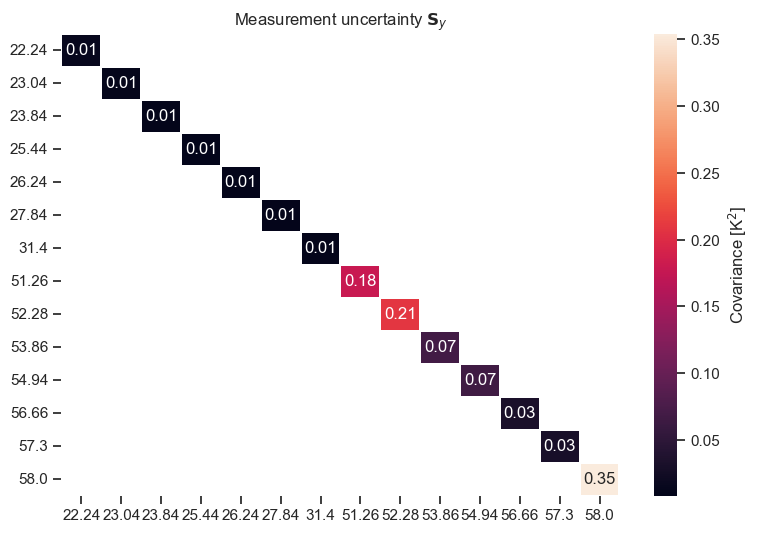

In [132]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_y.where(S_y > 0), 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [133]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars]
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars]

In [134]:
singularMatrix = np.array([[1,0,0], [1,0,1e-50], [1,1e-50,0]])
np.linalg.inv(singularMatrix)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e+50,  0.e+00,  1.e+50],
       [-1.e+50,  1.e+50,  0.e+00]])

In [135]:
x_truth

state
00000_t    303.350000
00084_t    299.150000
00365_t    297.350000
00673_t    295.150000
01087_t    293.350000
01573_t    290.750000
02043_t    290.150000
02521_t    289.350000
02955_t    290.350000
03352_t    289.950000
03487_t    289.950000
03793_t    288.550000
04219_t    286.950000
04675_t    285.350000
05148_t    282.150000
05638_t    280.950000
06124_t    280.150000
06593_t    278.150000
07014_t    277.550000
07392_t    276.150000
07717_t    275.950000
08016_t    274.350000
08320_t    273.150000
08646_t    271.850000
09077_t    271.050000
09524_t    271.050000
09952_t    269.050000
10321_t    262.250000
10623_t    260.650000
10858_t    260.450000
00000_q      1.321658
00084_q      1.331397
00365_q      1.291793
00673_q      1.198613
01087_q      1.166274
01573_q      1.164582
02043_q      1.145483
02521_q      1.042013
02955_q      0.982410
03352_q      0.947391
03487_q      0.737094
03793_q      0.674722
04219_q      0.666490
04675_q      0.629845
05148_q      0.803654
0563

In [136]:
import pandas as pd

# Assuming 'series' is your pandas Series
has_nan = x_truth.isna().any()

# Print whether there are NaN values
print("Are there any NaN values in the series?", has_nan)


Are there any NaN values in the series? False


In [137]:
try:
    pyOE.invertMatrix(singularMatrix)
except Exception as err:
    traceback.print_tb(err.__traceback__)

  File "C:\Users\angsh\AppData\Local\Temp\ipykernel_16596\384370707.py", line 2, in <module>
    pyOE.invertMatrix(singularMatrix)
  File "C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py", line 1485, in invertMatrix
    raise ValueError("Found singular matrix", UserWarning)


In [138]:
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [139]:
x_truth

state
00000_t    303.350000
00084_t    299.150000
00365_t    297.350000
00673_t    295.150000
01087_t    293.350000
01573_t    290.750000
02043_t    290.150000
02521_t    289.350000
02955_t    290.350000
03352_t    289.950000
03487_t    289.950000
03793_t    288.550000
04219_t    286.950000
04675_t    285.350000
05148_t    282.150000
05638_t    280.950000
06124_t    280.150000
06593_t    278.150000
07014_t    277.550000
07392_t    276.150000
07717_t    275.950000
08016_t    274.350000
08320_t    273.150000
08646_t    271.850000
09077_t    271.050000
09524_t    271.050000
09952_t    269.050000
10321_t    262.250000
10623_t    260.650000
10858_t    260.450000
00000_q      1.321658
00084_q      1.331397
00365_q      1.291793
00673_q      1.198613
01087_q      1.166274
01573_q      1.164582
02043_q      1.145483
02521_q      1.042013
02955_q      0.982410
03352_q      0.947391
03487_q      0.737094
03793_q      0.674722
04219_q      0.666490
04675_q      0.629845
05148_q      0.803654
0563

In [140]:
# forwardKwArgs = dict(
#     pressure=pressure.loc['SON'].values,
#     zenithAngle=0,
#     frequencies=frequencies
# )

y_obs = forwardRT(x_truth, **forwardKwArgs)
y_obs = pd.Series(y_obs, index=y_vars)
assert np.all(np.isfinite(y_obs))

In [141]:
oe_ref = pyOE.optimalEstimation(
    x_vars,       # state variable names
    x_a,          # a priori
    S_a,          # a priori uncertainty
    y_vars,       # measurement variable names
    y_obs,        # observations
    S_y,      # observation uncertainty
    forwardRT,    # forward Operator
    forwardKwArgs=forwardKwArgs,  # additional function arguments
    x_truth=x_truth,              # true profile
)


In [142]:
oe_ref.doRetrieval()

0.75 s, iteration 1, degrees of freedom: 2.53 of 60, converged (x-space):  0.131
1.09 s, iteration 2, degrees of freedom: 2.53 of 60, done.  0.000


True

In [143]:
print(oe_ref.x_op[:10])
print(oe_ref.S_op[:10])

00000_q      1.300698
00000_t    303.294232
00084_q      1.246687
00084_t    299.427325
00365_q      1.219403
00365_t    296.865728
00673_q      1.159476
00673_t    294.149642
01087_q      1.086687
01087_t    291.099434
dtype: float64
          00000_q   00000_t   00084_q   00084_t   00365_q   00365_t   00673_q  \
00000_q  0.001025 -0.000097  0.000637 -0.002053  0.000203  0.000859  0.000214   
00000_t -0.000097  0.029255 -0.001304 -0.041175  0.001325  0.100531  0.001556   
00084_q  0.000637 -0.001304  0.002053 -0.001064  0.001260 -0.007664  0.000720   
00084_t -0.002053 -0.041175 -0.001064  0.102549 -0.007003 -0.316654 -0.007059   
00365_q  0.000203  0.001325  0.001260 -0.007003  0.003703  0.017945  0.002916   
00365_t  0.000859  0.100531 -0.007664 -0.316654  0.017945  1.329876  0.019072   
00673_q  0.000214  0.001556  0.000720 -0.007059  0.002916  0.019072  0.008274   
00673_t  0.001863  0.096522 -0.005660 -0.303274  0.021857  1.102509  0.095113   
01087_q  0.000355  0.002790  0.00058

In [144]:
print(oe_ref.x_op_err[:10])

00000_q    0.032010
00000_t    0.171040
00084_q    0.045305
00084_t    0.320232
00365_q    0.060856
00365_t    1.153202
00673_q    0.090961
00673_t    2.181058
01087_q    0.142405
01087_t    3.983480
dtype: float64


In [145]:
print('total', oe_ref.dgf)
print(oe_ref.dgf_x[:10])

total 2.5317941727561317
00000_q    0.000029
00000_t    0.978210
00084_q    0.014792
00084_t    0.875108
00365_q    0.014332
00365_t    0.583521
00673_q    0.001787
00673_t    0.060100
01087_q    0.000149
01087_t    0.003633
dtype: float64


In [146]:
help(oe_ref)

Help on optimalEstimation in module pyOptimalEstimation.pyOEcore object:

class optimalEstimation(builtins.object)
 |  optimalEstimation(x_vars, x_a, S_a, y_vars, y_obs, S_y, forward, userJacobian=None, x_truth=None, b_vars=[], b_p=[], S_b=[[]], x_lowerLimit={}, x_upperLimit={}, useFactorInJac=False, gammaFactor=None, perturbation=0.1, disturbance=None, convergenceFactor=10, convergenceTest='x', forwardKwArgs={}, multipleForwardKwArgs=None, verbose=None)
 |  
 |  The core optimalEstimation class, which contains all required parameters.
 |  See [1]_ for an extensive introduction into Optimal Estimation theory, 
 |  [2]_ discusses this library
 |  
 |  Parameters
 |  ----------
 |  x_vars : list of str
 |      names of the elements of state vector x.
 |  x_a : pd.Series or list or np.ndarray
 |      prior information of state x.
 |  S_a : pd.DataFrame or list or np.ndarray
 |      covariance matrix of state x.
 |  y_vars : list of str
 |      names of the elements of state vector x
 |  y

C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py:1339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sp4.set_xticklabels(xlabels)


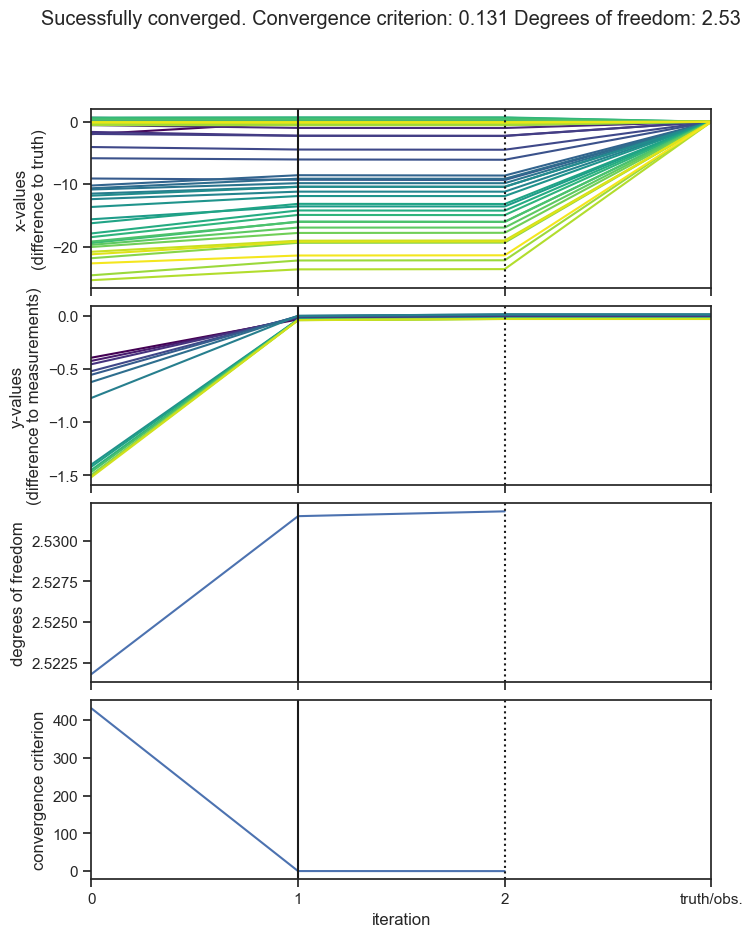

In [147]:
fig = oe_ref.plotIterations(legend=False, mode='difference')

In [148]:
oe_ref.x_op

00000_q      1.300698
00000_t    303.294232
00084_q      1.246687
00084_t    299.427325
00365_q      1.219403
00365_t    296.865728
00673_q      1.159476
00673_t    294.149642
01087_q      1.086687
01087_t    291.099434
01573_q      0.999337
01573_t    288.470011
02043_q      0.912718
02043_t    285.668749
02521_q      0.824257
02521_t    283.266783
02955_q      0.783138
02955_t    281.016633
03352_q      0.781116
03352_t    281.339664
03487_q      0.758265
03487_t    280.820788
03793_q      0.693769
03793_t    278.715199
04219_q      0.635178
04219_t    276.553135
04675_q      0.570044
04675_t    274.159309
05148_q      0.503295
05148_t    271.724654
05638_q      0.427479
05638_t    269.051361
06124_q      0.362373
06124_t    266.592115
06593_q      0.320535
06593_t    264.985232
07014_q      0.272294
07014_t    263.327188
07392_q      0.210770
07392_t    261.205946
07717_q      0.142314
07717_t    259.942506
08016_q      0.064327
08016_t    258.308995
08320_q     -0.040368
08320_t   

Text(0.5, 1.0, '$\\mathbf{S}_{op}$ Humidity')

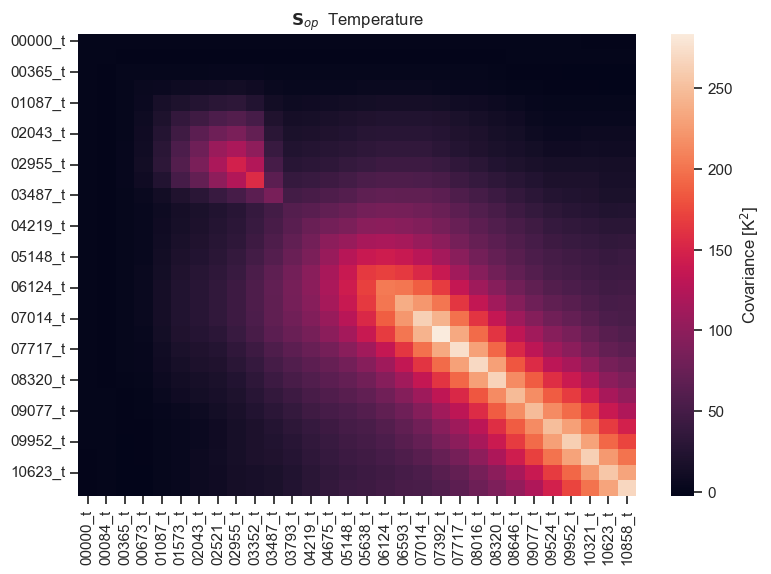

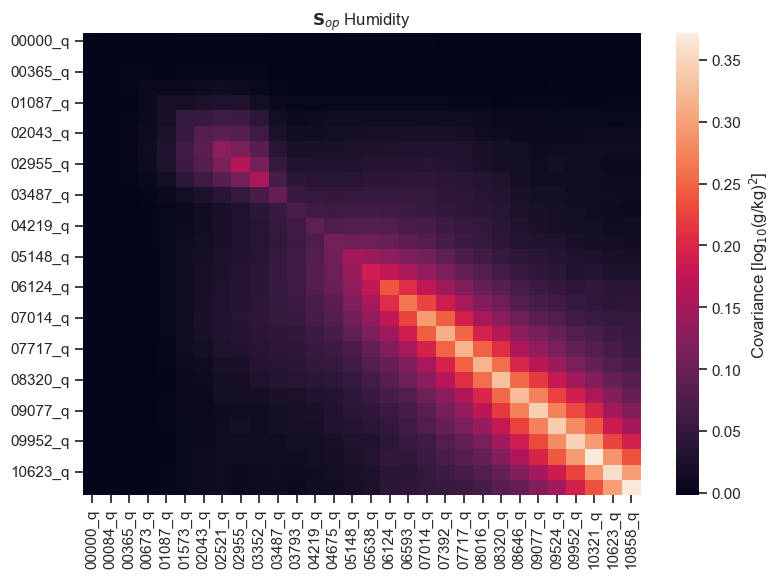

In [149]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbf{S}_{op}$  Temperature')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbf{S}_{op}$ Humidity')

In [150]:
oe_ref.x_op_err

00000_q     0.032010
00000_t     0.171040
00084_q     0.045305
00084_t     0.320232
00365_q     0.060856
00365_t     1.153202
00673_q     0.090961
00673_t     2.181058
01087_q     0.142405
01087_t     3.983480
01573_q     0.227744
01573_t     6.041469
02043_q     0.283649
02043_t     8.069480
02521_q     0.364014
02521_t    10.391318
02955_q     0.406477
02955_t    12.095157
03352_q     0.394122
03352_t    12.483432
03487_q     0.309926
03487_t     9.248463
03793_q     0.265247
03793_t     7.760719
04219_q     0.298186
04219_t     8.674658
04675_q     0.328738
04675_t     9.908552
05148_q     0.385686
05148_t    11.238228
05638_q     0.434179
05638_t    12.865504
06124_q     0.488662
06124_t    14.266389
06593_q     0.515590
06593_t    15.407883
07014_q     0.544958
07014_t    16.228406
07392_q     0.559700
07392_t    16.840035
07717_q     0.562817
07717_t    16.565247
08016_q     0.563145
08016_t    16.434029
08320_q     0.574204
08320_t    16.292866
08646_q     0.570305
08646_t    15

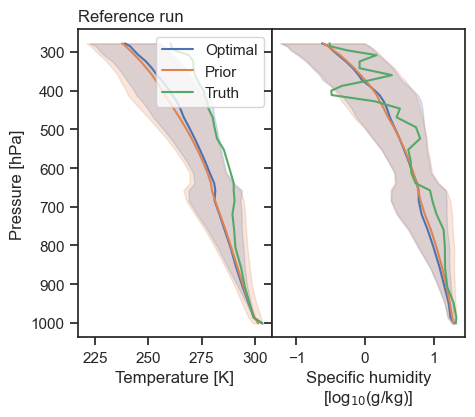

In [151]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='Reference run')

In [152]:
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_truth)

print('RMS X Temperature: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('RMS X Humidity: %g [log$_{10}$(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))
print('RMS Y %g [K]'% np.sqrt(np.mean((oe_ref.y_obs - oe_ref.y_op)**2)))

RMS X Temperature: 13.4172 [K]
RMS X Humidity: 2.27078 [log$_{10}$(g/kg)]
RMS Y 0.0199498 [K]


In [153]:
chiSquareTest = oe_ref.chiSquareTest(significance=0.05)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 60. (This is typically safe to ignore)       


In [154]:
print('\nTests passed:\n' ,chiSquareTest[0])


Tests passed:
 chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [155]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [156]:
x_a = x_mean.sel(season='JJA').to_pandas()  # as before
S_a = x_cov.sel(season='JJA')  # as before
S_a_diag = np.diag(np.diag(S_a))

In [157]:
oe_diag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a_diag,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_diag.doRetrieval()

0.66 s, iteration 1, degrees of freedom: 2.77 of 60, converged (x-space):  0.061
0.97 s, iteration 2, degrees of freedom: 2.77 of 60, done.  0.000


True

In [158]:
oe_diag.dgf, oe_ref.dgf

(2.7699889527696318, 2.5317941727561317)

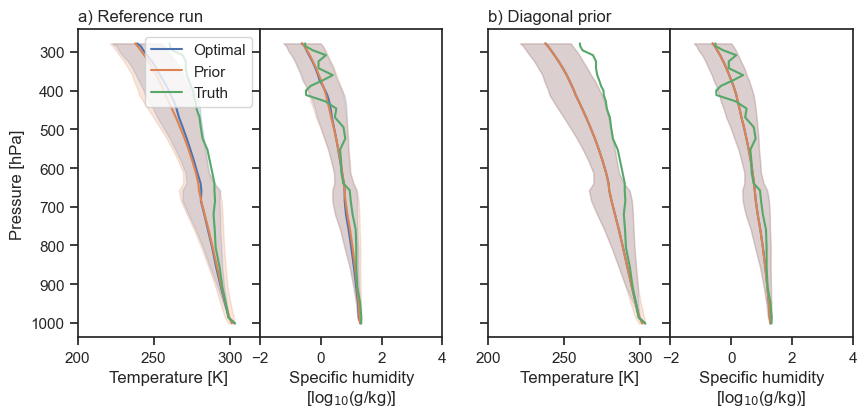

In [159]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)


In [160]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Diagonal prior:')
supporting_routines.print_mwr_rms(oe_diag)


Reference run:
RMS X Temperature: 13.4172 [K]
RMS X Humidity: 2.27078 [log$_{10}$(g/kg)]
RMS Y 0.0199498 [K]
Diagonal prior:
RMS X Temperature: 15.1775 [K]
RMS X Humidity: 1.93597 [log$_{10}$(g/kg)]
RMS Y 0.00663182 [K]


In [161]:
print(oe_diag.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [162]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_diag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [163]:
x_a = x_mean.sel(season='SON').to_pandas()
S_a = x_cov.sel(season='SON').to_pandas()
forwardKwArgs = dict(
    pressure=pressure.loc['SON'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [164]:
oe_sum = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_sum.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

True

In [165]:
oe_ref.dgf, oe_sum.dgf

(2.5317941727561317, 2.576772709705539)

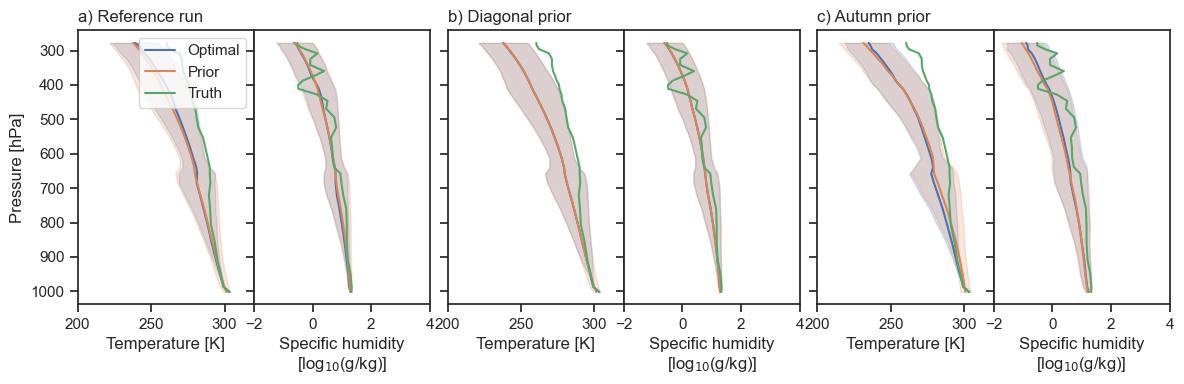

In [166]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    oe3 = oe_sum,
    h=pressure.loc['JJA'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    title3='c) Autumn prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)
fig.tight_layout()
fig.savefig('Figure2.png', dpi=200)
fig.savefig('Figure2.pdf')

In [167]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Autumn prior:')
supporting_routines.print_mwr_rms(oe_sum)

Reference run:
RMS X Temperature: 13.4172 [K]
RMS X Humidity: 2.27078 [log$_{10}$(g/kg)]
RMS Y 0.0199498 [K]
Autumn prior:
RMS X Temperature: 16.4679 [K]
RMS X Humidity: 3.47304 [log$_{10}$(g/kg)]
RMS Y 0.0209276 [K]


In [168]:
print(oe_sum.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [169]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_sum.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Linearity test passed:  True


In [170]:
S_b = pd.DataFrame(
    np.array([
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 3.0, 3.3, 1.2, 0.1, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 8.7, 9.2, 3.3, 0.3, 0.0, 0.0, 0.0],
        [0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.7, 8.2, 8.7, 3.0, 0.3, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    ]),
    index=frequencies[::-1],
    columns=frequencies)

Text(0.5, 1.0, "Model uncertainty $\\mathbf{S}_{b}$' (Cimini et al. 2018)")

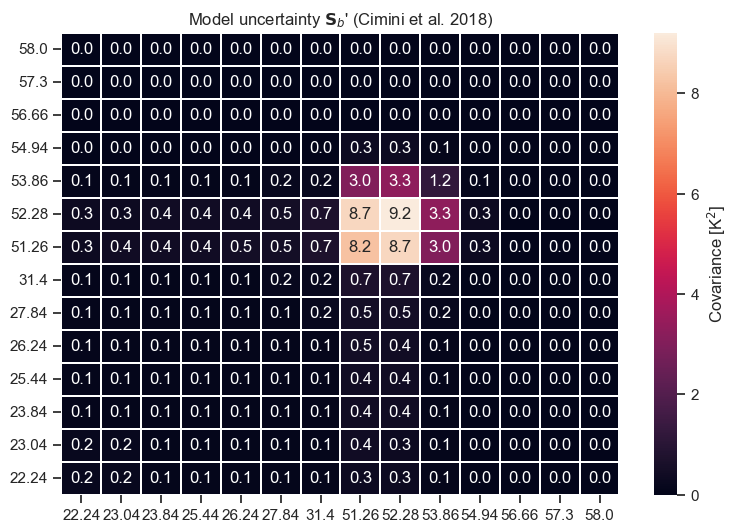

In [171]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_b, 
    annot=True, 
    linewidths=.05, 
    ax=ax, 
    fmt='.1f', 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r"Model uncertainty $\mathbf{S}_{b}$' (Cimini et al. 2018)")

In [172]:
x_a = x_mean.sel(season='JJA').to_pandas() # as for the reference run
S_a = x_cov.sel(season='JJA').to_pandas() # as for the reference run
S_e = S_y + S_b

assert (S_e.values == S_e.values.T).all()

forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_b = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_b.doRetrieval()

0.61 s, iteration 1, degrees of freedom: 2.01 of 60, converged (x-space):  0.011
0.94 s, iteration 2, degrees of freedom: 2.01 of 60, done.  0.000


True

In [173]:
oe_ref.dgf, oe_b.dgf

(2.5317941727561317, 2.008076892607662)

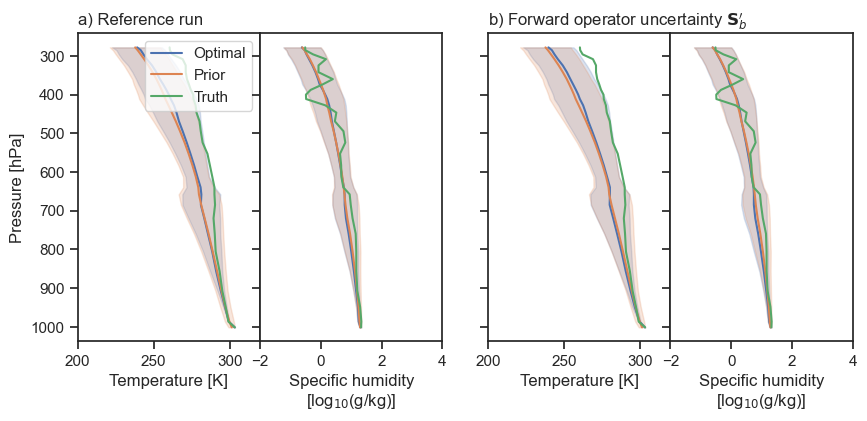

In [174]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_b,
    h=pressure.loc['JJA'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2="b) Forward operator uncertainty $\mathbf{S}_b'$",
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [175]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Concidering forward model error:')
supporting_routines.print_mwr_rms(oe_b)


Reference run:
RMS X Temperature: 13.4172 [K]
RMS X Humidity: 2.27078 [log$_{10}$(g/kg)]
RMS Y 0.0199498 [K]
Concidering forward model error:
RMS X Temperature: 13.5942 [K]
RMS X Humidity: 2.44013 [log$_{10}$(g/kg)]
RMS Y 0.071079 [K]


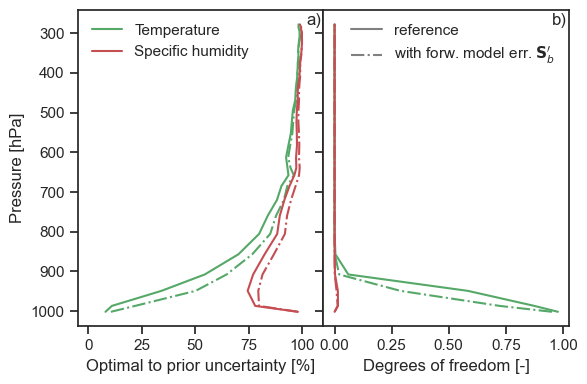

In [176]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_b, 'with forw. model err. $\mathbf{S}_b\'$',
    pressure.loc['JJA'] / 100,
)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('Figure3.png', dpi=200)
fig.savefig('Figure3.pdf')

In [177]:
((oe_b.x_op_err/oe_b.x_a_err) - (oe_ref.x_op_err/oe_ref.x_a_err)).max() * 100

16.0056879887924

In [178]:
print('Change in degrees of freedom for temperature variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[0].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[0].sum()))
print('Change in degrees of freedom for humidity variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[1].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[1].sum()))

Change in degrees of freedom for temperature variables 0.515582
Change in degrees of freedom for humidity variables 0.008135


In [179]:
print(oe_b.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [180]:
x_a = x_mean.sel(season='JJA').to_pandas() # as reference
S_a = x_cov.sel(season='JJA').to_pandas() # as reference
S_e = S_y * 4
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_double = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_double.doRetrieval()

0.62 s, iteration 1, degrees of freedom: 2.17 of 60, converged (x-space):  0.031
0.93 s, iteration 2, degrees of freedom: 2.17 of 60, done.  0.000


True

In [181]:
S_e = S_y / 4

oe_half = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_half.doRetrieval()

0.61 s, iteration 1, degrees of freedom: 2.83 of 60, converged (x-space):  0.494
0.91 s, iteration 2, degrees of freedom: 2.83 of 60, done.  0.000


True

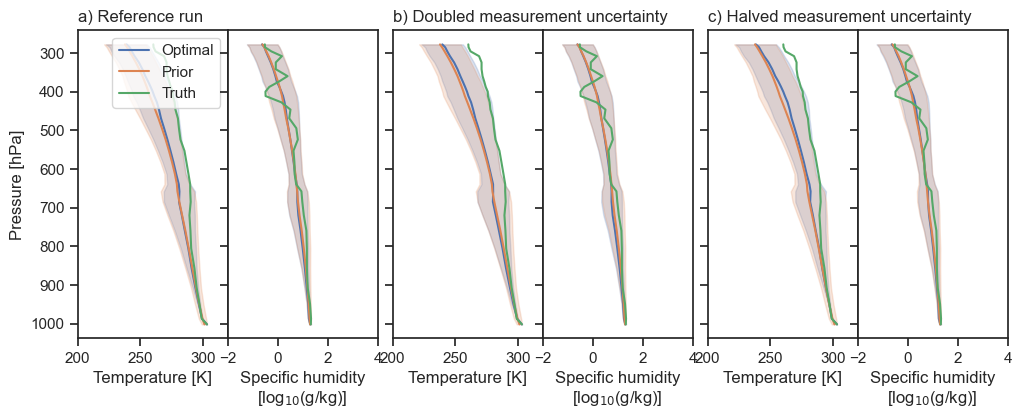

In [182]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_double,
    oe3 = oe_half,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Doubled measurement uncertainty',
    title3='c) Halved measurement uncertainty',
    xlimT = (200, 320),
    xlimH = (-2, 4),
)

In [183]:
print('### Reference run ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Doubled measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_double.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_double.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Halved measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_half.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_half.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))


### Reference run ###
Temperature RMS difference to x_a: 1.97009 [K]
Humidity RMS difference to x_a: 0.47449 [log10(g/kg)]

### Doubled measurement uncertainty ###
Temperature RMS difference to x_a: 1.82404 [K]
Humidity RMS difference to x_a: 0.61766 [log10(g/kg)]

### Halved measurement uncertainty ###
Temperature RMS difference to x_a: 2.18058 [K]
Humidity RMS difference to x_a: 0.366264 [log10(g/kg)]


Change in degrees of freedom for halved measurement uncertainties -0.298422
Change in degrees of freedom for doubled measurement uncertainties 0.360602


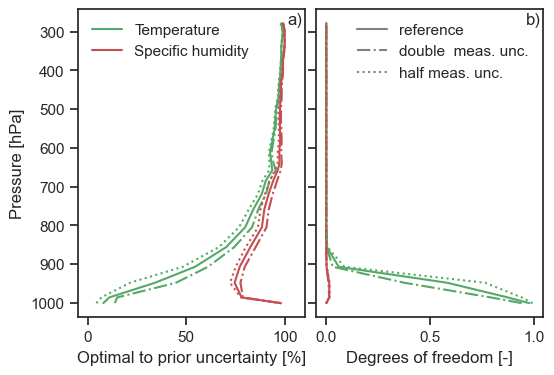

In [184]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_double, 'double  meas. unc.',
    pressure.loc['JJA'] / 100,
    oe3=oe_half, label3 = 'half meas. unc.'
)

print('Change in degrees of freedom for halved measurement uncertainties %g' %
      (oe_ref.dgf - oe_half.dgf))
print('Change in degrees of freedom for doubled measurement uncertainties %g' %
      (oe_ref.dgf - oe_double.dgf))


In [185]:
print(oe_double.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_double.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [186]:
print(oe_half.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_half.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$ including non-diagonal elements.')

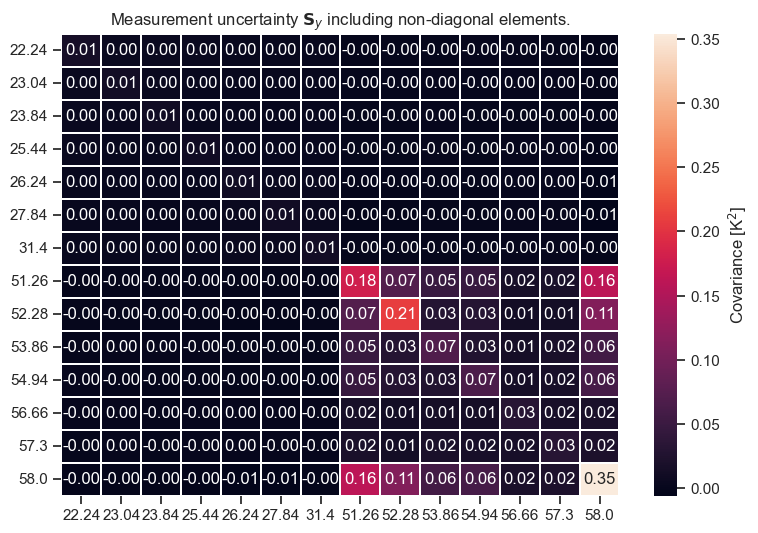

In [187]:
S_y_nondiag = np.array(
    [[
        1.4464e-02, 3.1175e-03, 3.2584e-03, 2.7590e-03, 2.1494e-03, 1.8121e-03,
        2.3444e-03, -2.8253e-03, -1.1941e-03, -7.1487e-04, -7.1019e-05,
        -1.3676e-04, -3.0526e-04, -3.8639e-03
    ],
     [
         3.1175e-03, 1.1803e-02, 2.5663e-03, 2.1457e-03, 1.5946e-03,
         1.6916e-03, 1.8975e-03, -7.3124e-04, -4.7555e-04, 1.8126e-04,
         -8.1855e-04, 4.6114e-04, 3.1963e-06, -2.5867e-03
     ],
     [
         3.2584e-03, 2.5663e-03, 1.0841e-02, 2.3239e-03, 1.1311e-03,
         1.1062e-03, 1.5767e-03, -6.4790e-04, -1.3201e-03, 1.7669e-04,
         -1.0165e-03, -4.5220e-04, -5.8443e-04, -1.9019e-03
     ],
     [
         2.7590e-03, 2.1457e-03, 2.3239e-03, 8.4360e-03, 1.3579e-03,
         1.5264e-03, 1.4780e-03, -8.7548e-04, -1.5626e-03, -1.7332e-04,
         -4.6437e-04, -1.8432e-04, -1.7265e-04, -3.8433e-03
     ],
     [
         2.1494e-03, 1.5946e-03, 1.1311e-03, 1.3579e-03, 1.0352e-02,
         3.3218e-03, 3.1755e-03, -2.2734e-03, -2.3389e-03, -1.2198e-03,
         -7.2950e-04, 2.0710e-04, 2.5822e-04, -5.9091e-03
     ],
     [
         1.8121e-03, 1.6916e-03, 1.1062e-03, 1.5264e-03, 3.3218e-03,
         1.0172e-02, 3.2801e-03, -2.0768e-03, -2.1563e-03, -4.6483e-04,
         -1.6465e-03, 9.4358e-05, -2.8649e-04, -5.4612e-03
     ],
     [
         2.3444e-03, 1.8975e-03, 1.5767e-03, 1.4780e-03, 3.1755e-03,
         3.2801e-03, 1.1026e-02, -3.1658e-04, -1.1692e-03, -7.5206e-04,
         -1.0920e-03, -3.7627e-05, -2.0978e-04, -1.7690e-03
     ],
     [
         -2.8253e-03, -7.3124e-04, -6.4790e-04, -8.7548e-04, -2.2734e-03,
         -2.0768e-03, -3.1658e-04, 1.7896e-01, 7.2248e-02, 4.8262e-02,
         4.6481e-02, 1.6283e-02, 1.8456e-02, 1.6027e-01
     ],
     [
         -1.1941e-03, -4.7555e-04, -1.3201e-03, -1.5626e-03, -2.3389e-03,
         -2.1563e-03, -1.1692e-03, 7.2248e-02, 2.0847e-01, 2.8595e-02,
         2.9832e-02, 1.1226e-02, 1.3614e-02, 1.1240e-01
     ],
     [
         -7.1487e-04, 1.8126e-04, 1.7669e-04, -1.7332e-04, -1.2198e-03,
         -4.6483e-04, -7.5206e-04, 4.8262e-02, 2.8595e-02, 6.9126e-02,
         2.5361e-02, 1.3994e-02, 1.8141e-02, 5.6810e-02
     ],
     [
         -7.1019e-05, -8.1855e-04, -1.0165e-03, -4.6437e-04, -7.2950e-04,
         -1.6465e-03, -1.0920e-03, 4.6481e-02, 2.9832e-02, 2.5361e-02,
         6.5223e-02, 1.3962e-02, 1.6982e-02, 6.0963e-02
     ],
     [
         -1.3676e-04, 4.6114e-04, -4.5220e-04, -1.8432e-04, 2.0710e-04,
         9.4358e-05, -3.7627e-05, 1.6283e-02, 1.1226e-02, 1.3994e-02,
         1.3962e-02, 3.1456e-02, 1.7948e-02, 1.8197e-02
     ],
     [
         -3.0526e-04, 3.1963e-06, -5.8443e-04, -1.7265e-04, 2.5822e-04,
         -2.8649e-04, -2.0978e-04, 1.8456e-02, 1.3614e-02, 1.8141e-02,
         1.6982e-02, 1.7948e-02, 3.0822e-02, 2.1850e-02
     ],
     [
         -3.8639e-03, -2.5867e-03, -1.9019e-03, -3.8433e-03, -5.9091e-03,
         -5.4612e-03, -1.7690e-03, 1.6027e-01, 1.1240e-01, 5.6810e-02,
         6.0963e-02, 1.8197e-02, 2.1850e-02, 3.5390e-01
     ]])

S_y_nondiag = pd.DataFrame(
    S_y_nondiag,
    index=y_vars,
    columns=y_vars,
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_y_nondiag, annot=True, fmt='.2f', ax=ax, linewidths=.05, cbar_kws={'label':'Covariance [K$^2$]'})

ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$ including non-diagonal elements.')



In [188]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars] # as reference run
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars] # as reference run
S_e = S_y_nondiag

forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_nondiag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_nondiag.doRetrieval()

0.62 s, iteration 1, degrees of freedom: 2.49 of 60, converged (x-space):  0.057
0.92 s, iteration 2, degrees of freedom: 2.49 of 60, done.  0.000


True

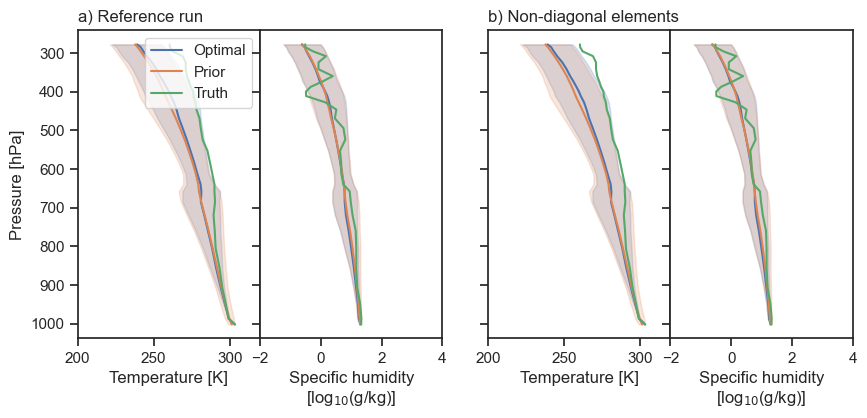

In [189]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_nondiag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Non-diagonal elements',
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [190]:
oe_nondiag.dgf - oe_ref.dgf

-0.04472004831585297

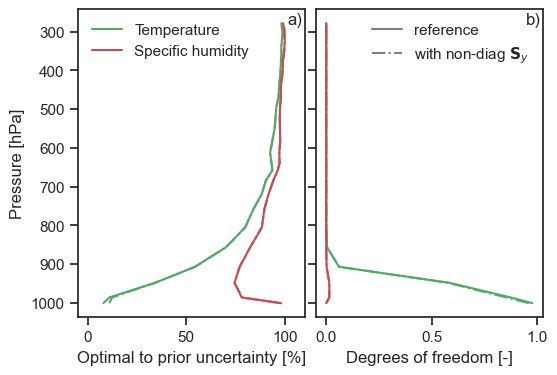

In [191]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_nondiag, 'with non-diag $\mathbf{S}_y$',
    pressure.loc['JJA'] / 100,
)

In [192]:
print(oe_nondiag.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_nondiag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [193]:
x_a = x_mean.sel(season='JJA').to_pandas()  # as reference run
S_a = x_cov.sel(season='JJA').to_pandas()   # as reference run

In [194]:
oe_testy = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
    convergenceTest='y'
)
oe_testy.doRetrieval()

0.62 s, iteration 1, degrees of freedom: 2.53 of 60, not converged (y-space):  524.227
0.92 s, iteration 2, degrees of freedom: 2.53 of 60, converged (y-space):  0.000
1.24 s, iteration 3, degrees of freedom: 2.53 of 60, done.  0.000


True

In [195]:
oe_testy.dgf, oe_ref.dgf

(2.531794210893182, 2.5317941727561317)

In [196]:
print('Reference run with test in x-space:')
supporting_routines.print_mwr_rms(oe_ref)
print('Test in y-space:')
supporting_routines.print_mwr_rms(oe_testy)


Reference run with test in x-space:
RMS X Temperature: 13.4172 [K]
RMS X Humidity: 2.27078 [log$_{10}$(g/kg)]
RMS Y 0.0199498 [K]
Test in y-space:
RMS X Temperature: 13.4171 [K]
RMS X Humidity: 2.2708 [log$_{10}$(g/kg)]
RMS Y 0.0199429 [K]


In [197]:
print(oe_testy.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [198]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_testy.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True
